___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Vitor Pereira

## Rafael Almada



___

## INTRODUÇÃO

O objetivo do projeto é criar um modelo preditivo conduzido por uma análise de dados a partir de um dataset escolhido, e a partir de variáveis qualitativas e quantitativas correlacionadas, estimar o valor de uma variável qualitativa. Para tanto nós decidimos fazer uma análise preditiva da variável quantitativa "renda", baseando-se no uso da PNAD 2015 (dataset utilizado no projeto 1), utilizando as variáveis explicativas que a dupla julgou relevantes: Região de nascimento, sexo, idade, cor ou raça, grau de alfabetização, e rendimento domiciliar per capita no mês da pesquisa. 
Dadas essas variaveis pretendemos analisar a partir de uma regressão linear, a dispersão dessas variáveis explicativas em relação a renda, ou seja, o quanto essas variáveis selecionadas se relacionam com a renda de uma pessoa que respondeu a pesquisa. Feita a regressão linear vamos comparar os valores obtidos de renda à renda real de pessoas aleatórias para validar a qualidade da predição. 

___
## MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

[Detalhe aqui as características da base de dados além da análise descritiva.]

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
import math as math
from scipy import stats
import statsmodels.api as sm

C:\Users\vitor\Anaconda3.5\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [42]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

valores=pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')


dados=pd.DataFrame({

    'Estado' :valores.UF,
    'Sexo' :valores.V0302,
    'Idade' :valores.V8005,
    'Cor_ou_raca':valores.V0404,
    'Sabe_ler_e_escrever' :valores.V0601,
    'renda' :valores.V4720,
    'Rendimento_mensal_domiciliar_per_capita' :valores.V4742
    })



dados=dados[['Estado','Sexo','Idade','Cor_ou_raca','Sabe_ler_e_escrever','renda','Rendimento_mensal_domiciliar_per_capita']]


dados.Sexo=dados.Sexo.astype('category')
dados.Sexo.cat.categories=(['Masculino','Feminino'])

dados.Cor_ou_raca=dados.Cor_ou_raca.astype('category')
dados.Cor_ou_raca.cat.categories=(['Indígena','Branca','Preta','Amarela','Parda','Sem declaração'])

dados.Sabe_ler_e_escrever=dados.Sabe_ler_e_escrever.astype('category')
dados.Sabe_ler_e_escrever.cat.categories=('Sim','Não')

dados.Rendimento_mensal_domiciliar_per_capita=dados.Rendimento_mensal_domiciliar_per_capita.round(1)

def Estados(linha):
    if linha>=11 and linha<=17:
        return 'Norte'
    if linha>=21 and linha<=29:
        return 'Nordeste'
    if linha>=31 and linha<=35:
        return 'Sudeste'
    if linha>=41 and linha<=43:
        return 'Sul'
    if linha>=50 and linha<=53:
        return 'Centro-Oeste'
    
dados.Estado=dados.Estado.apply(Estados)

#dados=dados.dropna()

#dados=dados[['renda']]

#dados
#.rendimento.mean()

Esperamos trabalhar no diretório
C:\Users\vitor\Documents\DP dados


### BASE DE DADOS

In [3]:
dados

,Estado,Sexo,Idade,Cor_ou_raca,Sabe_ler_e_escrever,renda,Rendimento_mensal_domiciliar_per_capita
0,Norte,Masculino,23,Indígena,Sim,800.0,8.000000e+02
1,Norte,Feminino,23,Preta,Sim,1150.0,1.150000e+03
2,Norte,Feminino,35,Indígena,Sim,880.0,7.930000e+02
3,Norte,Masculino,34,Indígena,Sim,3000.0,7.930000e+02
4,Norte,Feminino,11,Indígena,Sim,0.0,7.930000e+02
5,Norte,Feminino,7,Indígena,Sim,NaN,7.930000e+02
6,Norte,Feminino,4,Indígena,Não,NaN,7.930000e+02
7,Norte,Feminino,18,Indígena,Sim,880.0,7.930000e+02
8,Norte,Masculino,46,Preta,Sim,3500.0,2.900000e+03
9,Norte,Feminino,81,Indígena,Sim,2300.0,2.900000e+03


### ANÁLISE DESCRITIVA

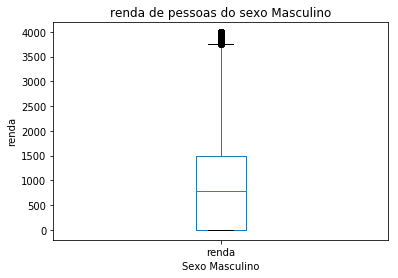

In [64]:
dados=dados[dados.renda<4000]

BoxMasc=dados[(dados.Sexo == "Masculino")]
BoxFem=dados[(dados.Sexo == "Feminino")]

plot = BoxMasc.renda.plot(kind='box',title='.')

plt.ylabel('renda')
plt.xlabel('Sexo Masculino')
plt.title('renda de pessoas do sexo Masculino')
plt.show()



In [65]:
BoxMasc.describe()

,Idade,renda,Rendimento_mensal_domiciliar_per_capita
count,135776.000000,135776.000000,1.355600e+05
mean,36.806453,950.187146,1.096194e+10
std,18.770094,881.788604,1.041242e+11
min,10.000000,0.000000,0.000000e+00
25%,21.000000,0.000000,3.790000e+02
50%,34.000000,788.000000,6.620000e+02
75%,50.000000,1500.000000,1.060000e+03
max,107.000000,3991.000000,1.000000e+12


Text(0.5,1,'renda de pessoas do sexo Masculino')

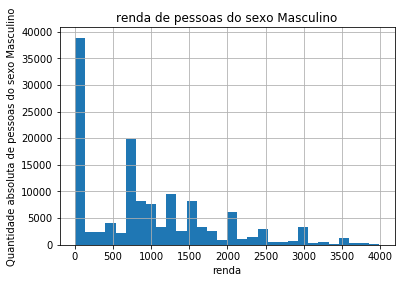

In [66]:
BoxMasc.hist(column="renda",bins=30)
plt.ylabel('Quantidade absoluta de pessoas do sexo Masculino')
plt.xlabel('renda')
plt.title('renda de pessoas do sexo Masculino')

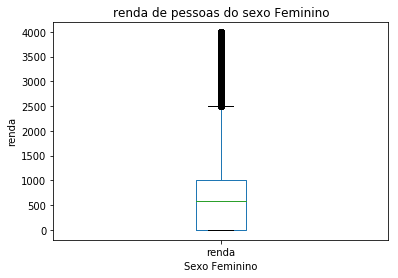

In [67]:
plot = BoxFem.renda.plot(kind='box',title='.')#, color='red')

plt.ylabel('renda')
plt.xlabel('Sexo Feminino')
plt.title('renda de pessoas do sexo Feminino')
plt.show()

In [68]:
BoxFem.describe()

,Idade,renda,Rendimento_mensal_domiciliar_per_capita
count,152513.000000,152513.000000,1.521990e+05
mean,39.151594,670.510901,1.355462e+10
std,19.244465,771.069458,1.156330e+11
min,10.000000,0.000000,0.000000e+00
25%,23.000000,0.000000,3.790000e+02
50%,37.000000,580.000000,6.670000e+02
75%,53.000000,1000.000000,1.121000e+03
max,115.000000,3992.000000,1.000000e+12


Text(0.5,1,'renda de pessoas do sexo Feminino')

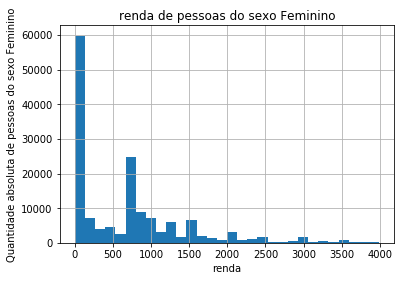

In [69]:
BoxFem.hist(column="renda",bins=30)
plt.ylabel('Quantidade absoluta de pessoas do sexo Feminino')
plt.xlabel('renda')
plt.title('renda de pessoas do sexo Feminino')

In [70]:
Grafico_cor_ou_raca=dados.Cor_ou_raca.value_counts()
Grafico_cor_ou_raca

Parda             141483
Branca            115251
Preta              29269
Indígena            1284
Amarela              998
Sem declaração         4
Name: Cor_ou_raca, dtype: int64

Text(0.5,1,'Porcentagem de pessoas que de cada cor ou raça')

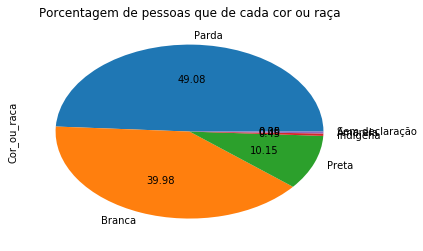

In [71]:
Grafico_cor_ou_raca.plot(kind='pie',autopct="%0.2f")
plt.title('Porcentagem de pessoas que de cada cor ou raça')

In [72]:
BoxParda=dados[(dados.Cor_ou_raca == 'Parda')]
BoxIndigena=dados[(dados.Cor_ou_raca == 'Indígena')]
BoxBranca=dados[(dados.Cor_ou_raca == 'Branca')]
BoxPreta=dados[(dados.Cor_ou_raca == 'Preta')]
BoxAmarela=dados[(dados.Cor_ou_raca == 'Amarela' )]


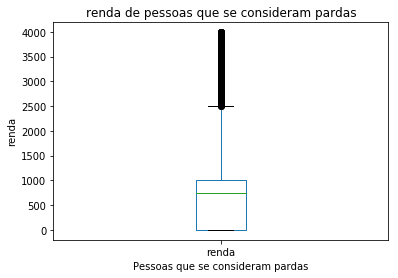

In [73]:
plot = BoxParda.renda.plot(kind='box',title='.')
plt.ylabel('renda')
plt.xlabel('Pessoas que se consideram pardas')
plt.title('renda de pessoas que se consideram pardas')
plt.show()

In [74]:
BoxParda.describe()

,Idade,renda,Rendimento_mensal_domiciliar_per_capita
count,141483.000000,141483.000000,1.412650e+05
mean,36.550921,698.394231,9.931689e+09
std,18.553241,758.967807,9.916209e+10
min,10.000000,0.000000,0.000000e+00
25%,21.000000,0.000000,3.110000e+02
50%,34.000000,740.000000,5.460000e+02
75%,50.000000,1000.000000,8.920000e+02
max,105.000000,3991.000000,1.000000e+12


Text(0.5,1,'renda de pessoas que se consideram pardas')

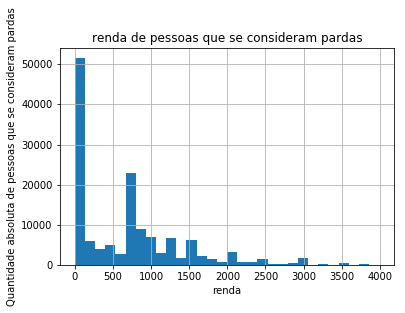

In [76]:
BoxParda.hist(column="renda",bins=30)
plt.ylabel('Quantidade absoluta de pessoas que se consideram pardas')
plt.xlabel('renda')
plt.title('renda de pessoas que se consideram pardas')

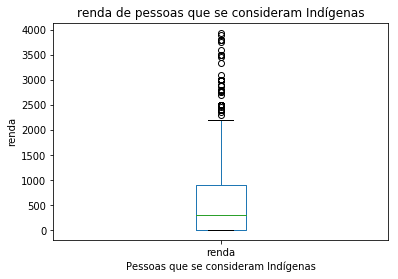

In [77]:
plot = BoxIndigena.renda.plot(kind='box',title='.')
plt.ylabel('renda')
plt.xlabel('Pessoas que se consideram Indígenas')
plt.title('renda de pessoas que se consideram Indígenas')
plt.show()

In [78]:
BoxIndigena.describe()

,Idade,renda,Rendimento_mensal_domiciliar_per_capita
count,1284.000000,1284.000000,1.283000e+03
mean,35.499221,624.660436,2.572097e+10
std,18.484410,768.859270,1.583633e+11
min,10.000000,0.000000,0.000000e+00
25%,20.000000,0.000000,1.870000e+02
50%,33.000000,310.000000,4.170000e+02
75%,48.000000,900.000000,7.935000e+02
max,100.000000,3940.000000,1.000000e+12


Text(0.5,1,'renda de pessoas que se consideram Indígena')

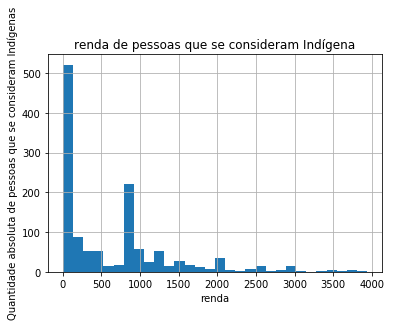

In [79]:
BoxIndigena.hist(column="renda",bins=30)
plt.ylabel('Quantidade absoluta de pessoas que se consideram Indígenas')
plt.xlabel('renda')
plt.title('renda de pessoas que se consideram Indígena')

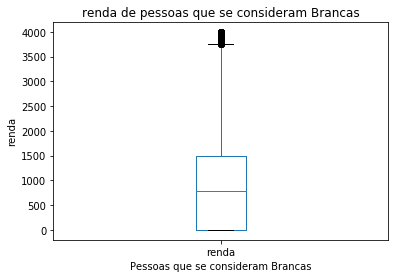

In [80]:
plot = BoxBranca.renda.plot(kind='box',title='.')
plt.ylabel('renda')
plt.xlabel('Pessoas que se consideram Brancas')
plt.title('renda de pessoas que se consideram Brancas')
plt.show()

In [81]:
BoxBranca.describe()

,Idade,renda,Rendimento_mensal_domiciliar_per_capita
count,115251.000000,115251.000000,1.150390e+05
mean,39.597348,933.489002,1.562079e+10
std,19.655985,922.305085,1.240037e+11
min,10.000000,0.000000,0.000000e+00
25%,23.000000,0.000000,5.000000e+02
50%,37.000000,788.000000,8.190000e+02
75%,54.000000,1500.000000,1.397000e+03
max,110.000000,3992.000000,1.000000e+12


Text(0.5,1,'renda de pessoas que se consideram Brancas')

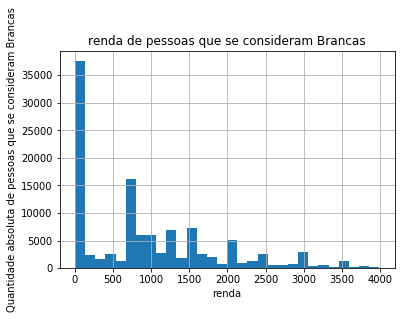

In [82]:
BoxBranca.hist(column="renda",bins=30)
plt.ylabel('Quantidade absoluta de pessoas que se consideram Brancas')
plt.xlabel('renda')
plt.title('renda de pessoas que se consideram Brancas')

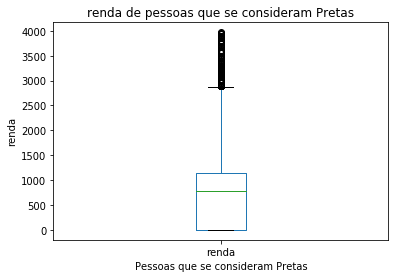

In [83]:
plot = BoxPreta.renda.plot(kind='box',title='.')
plt.ylabel('renda')
plt.xlabel('Pessoas que se consideram Pretas')
plt.title('renda de pessoas que se consideram Pretas')
plt.show()

In [84]:
BoxPreta.describe()

,Idade,renda,Rendimento_mensal_domiciliar_per_capita
count,29269.000000,29269.000000,2.917200e+04
mean,39.166900,786.823704,9.632525e+09
std,18.453973,758.641338,9.767326e+10
min,10.000000,0.000000,0.000000e+00
25%,24.000000,0.000000,3.500000e+02
50%,37.000000,788.000000,5.960000e+02
75%,52.000000,1150.000000,9.250000e+02
max,115.000000,3972.000000,1.000000e+12


Text(0.5,1,'renda de pessoas que se consideram Pretas')

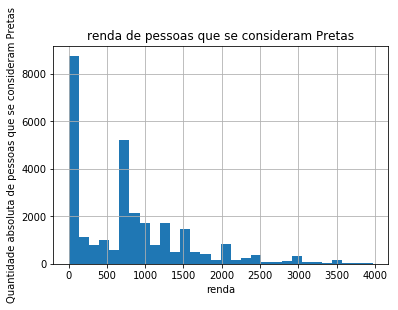

In [85]:
BoxPreta.hist(column="renda",bins=30)
plt.ylabel('Quantidade absoluta de pessoas que se consideram Pretas')
plt.xlabel('renda')
plt.title('renda de pessoas que se consideram Pretas')

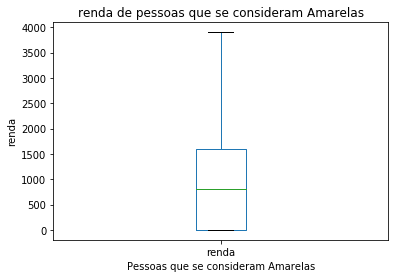

In [86]:
plot = BoxAmarela.renda.plot(kind='box',title='.')
plt.ylabel('renda')
plt.xlabel('Pessoas que se consideram Amarelas')
plt.title('renda de pessoas que se consideram Amarelas')
plt.show()

In [87]:
BoxAmarela.describe()

,Idade,renda,Rendimento_mensal_domiciliar_per_capita
count,998.000000,998.000000,9.960000e+02
mean,41.488978,1048.276553,3.313253e+10
std,20.688728,1053.318781,1.790725e+11
min,10.000000,0.000000,0.000000e+00
25%,24.000000,0.000000,5.440000e+02
50%,38.000000,800.000000,1.093000e+03
75%,58.000000,1600.000000,1.920000e+03
max,97.000000,3900.000000,1.000000e+12


Text(0.5,1,'renda de pessoas que se consideram Amarelas')

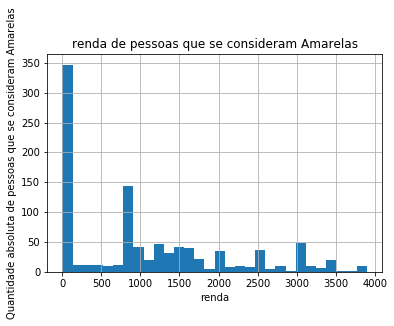

In [88]:
BoxAmarela.hist(column="renda",bins=30)
plt.ylabel('Quantidade absoluta de pessoas que se consideram Amarelas')
plt.xlabel('renda')
plt.title('renda de pessoas que se consideram Amarelas')

___
## MODELOS DE PREDIÇÃO:

___
## Validação cruzada:

In [10]:
#divisao teste e treinamento x 10
from sklearn.model_selection import train_test_split

for i in range (10):
    dados_treino, dados_teste = train_test_split(dados,test_size=0.1)
    
dados_treino.head(5)

,Estado,Sexo,Idade,Cor_ou_raca,Sabe_ler_e_escrever,renda,Rendimento_mensal_domiciliar_per_capita
291571,Sul,Feminino,51,Preta,Sim,0.0,540.0
178890,Sudeste,Masculino,26,Preta,Sim,1200.0,2075.0
244044,Sudeste,Masculino,26,Preta,Sim,2081.0,2081.0
142146,Nordeste,Masculino,62,Amarela,Sim,788.0,444.0
187236,Sudeste,Masculino,34,Indígena,Sim,2200.0,1233.0


___
## MODELO DE PREDIÇÃO PELA MÉDIA:

In [11]:
Media_renda=dados_treino.renda.mean()
Media_renda

#print(len(dados_treino))

802.1324789948354

___
## R2

In [12]:
Somatoria1=0
Somatoria2=0

for i in range(len(dados_treino)):
    A1=(dados_treino.renda.iloc[i]-Media_renda)**2
    Somatoria1+=A1
    A2=(dados_treino.renda.iloc[i]-Media_renda)**2
    Somatoria2+=A2
    
R2= 1-(Somatoria1/Somatoria2)
R2

0.0

___
## RMS

In [13]:
Somatoria3=0

for i in range(len(dados_treino)):
    A1=(dados_treino.renda.iloc[i]-Media_renda)**2
    Somatoria3+=A1
    
    
RMS=((Somatoria3)**(1/2))/len(dados_treino)
RMS

1.6433589158216462

___
## MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression):

In [14]:
ListaVi=0

for j in range (1,30):
    for i in range(j):
        Vi=dados_treino.renda.iloc[i]-dados_treino.renda.mean()
        ListaVi+=(Vi)  
    MediaVi=(ListaVi/j)
    print("para {0} vizinhos, a variação da renda de cada indivíduo para a média de renda é de: {1}".format(j,MediaVi))


para 1 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: -802.1324789948354
para 2 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: -603.1987184922532
para 3 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: -110.5982913230041
para 4 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: 132.16880251291155
para 5 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: 557.4025630154939
para 6 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: 707.2029901847428
para 7 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: 828.184369734944
para 8 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: 917.1538445232402
para 9 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: 897.2264939147111
para 10 vizinhos, a variação da renda de cada indivíduo para a média de renda é de: 886.

___
## MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression):

In [15]:
valores2=pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')


dados_regressao=pd.DataFrame({

    'Estado' :valores2.UF,
    'Sexo' :valores2.V0302,
    'Idade' :valores2.V8005,
    'Cor_ou_raca':valores2.V0404,
    'Sabe_ler_e_escrever' :valores2.V0601,
    'renda' :valores2.V4720,
    'Rendimento_mensal_domiciliar_per_capita' :valores2.V4742
    })



dados_regressao=dados_regressao[['Estado','Sexo','Idade','Cor_ou_raca','Sabe_ler_e_escrever','renda','Rendimento_mensal_domiciliar_per_capita']]

dados_regressao['Rendimento_mensal_domiciliar_per_capita']=(dados_regressao['Rendimento_mensal_domiciliar_per_capita']).fillna(0.0).astype(int)

dados_regressao=dados_regressao[dados_regressao.renda<40000]

dados_regressao=dados_regressao[dados_regressao.Rendimento_mensal_domiciliar_per_capita<40000]

dados_regressao=dados_regressao[dados_regressao.Rendimento_mensal_domiciliar_per_capita>-1]


for i in range (10):
    dados_regressao_treino, dados_regressao_teste = train_test_split(dados_regressao,test_size=0.1)
    
dados_regressao_treino.head(10)

,Estado,Sexo,Idade,Cor_ou_raca,Sabe_ler_e_escrever,renda,Rendimento_mensal_domiciliar_per_capita
117476,26,4,30,2,1,860.0,576
184241,31,4,20,2,1,0.0,940
236421,35,4,69,2,1,788.0,2288
260353,35,2,79,2,1,1000.0,2029
115134,26,4,46,2,1,600.0,600
5176,11,4,79,2,3,1576.0,692
36332,15,2,66,4,1,788.0,525
139299,29,4,22,8,1,0.0,533
304864,43,4,33,2,1,100.0,316
55194,17,4,59,8,1,0.0,394


Para a realização da predição é importante que as variaveis não estejam em formato texto, por isso foi utilizado novamente o dataset mas dessa vez sem converter as variaveis para formato texto.

In [16]:
Variaveis_Independentes_treino=dados_regressao_treino.iloc[0:,[0,1,2,3,4,6]].values
Variavel_Dependente_treino=dados_regressao_treino.iloc[0:,[5]].values
Variaveis_Independentes_teste=dados_regressao_teste.iloc[0:,[0,1,2,3,4,6]].values
Variavel_Dependente_teste=dados_regressao_teste.iloc[0:,[5]].values

Nessa parte do código, as colunas das variáveis que serão usadas para prever a renda (Estado, Sexo, Idade, Cor_ou_raca, Sabe_ler_e_escrever, renda, Rendimento_mensal_domiciliar_per_capita) são armazenadas na variável Variaveis_Independentes. E a coluna da variável a ser prevista é armazenada na variável Variavel_Dependente.
Cada uma delas sendo divididas nas vertentes teste e treinamento.

In [17]:
Variaveis_Independentes_treino

array([[  26,    4,   30,    2,    1,  576],
       [  31,    4,   20,    2,    1,  940],
       [  35,    4,   69,    2,    1, 2288],
       ...,
       [  21,    4,   60,    8,    3,  788],
       [  41,    2,   45,    2,    1,  186],
       [  15,    4,   39,    2,    1,  716]], dtype=int64)

In [18]:
Variavel_Dependente_treino

array([[ 860.],
       [   0.],
       [ 788.],
       ...,
       [ 788.],
       [ 980.],
       [1500.]])

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
Regressao=LinearRegression()
regfit=Regressao.fit(Variaveis_Independentes_treino,Variavel_Dependente_treino)
renda_prevista=Regressao.predict(Variaveis_Independentes_teste)
renda_prevista


array([[1768.37929725],
       [ 718.06181142],
       [ 396.06681372],
       ...,
       [1173.68213586],
       [ 984.74091321],
       [1453.7565167 ]])

___
## R2

In [21]:
#print (len (renda_prevista))
#print (len (Variaveis_Independentes_treino))
#print (len (Variaveis_Independentes_teste))
#print(dados_regressao_teste.renda.mean())

Somatoria1=0
Somatoria2=0

for i in range (len(Variaveis_Independentes_teste)):
    A1=(dados_regressao_teste.renda.iloc[i]-renda_prevista[i])**2
    Somatoria1+=A1
    A2=(dados_regressao_teste.renda.iloc[i]-dados_regressao_teste.renda.mean())**2
    Somatoria2+=A2
    
R2= 1-(Somatoria1/Somatoria2)
R2




array([0.55816149])

___
## RMS

In [22]:
Somatoria3=0


for i in range (len(renda_prevista)):
    A1=(dados_regressao_teste.renda.iloc[i]-renda_prevista[i])**2
    Somatoria3+=A1
    
RMS=((Somatoria3)**(1/2))/len(renda_prevista)
RMS


array([8.07757116])

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

x=Variaveis_Independentes_treino
y=Variavel_Dependente_treino

olsmod = sm.OLS(y,x)
olres = olsmod.fit()
print(olres.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                 8.899e+04
Date:                Tue, 05 Jun 2018   Prob (F-statistic):               0.00
Time:                        14:02:43   Log-Likelihood:            -2.3549e+06
No. Observations:              271690   AIC:                         4.710e+06
Df Residuals:                  271684   BIC:                         4.710e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.4604      0.206     26.472      0.0

30188
30188


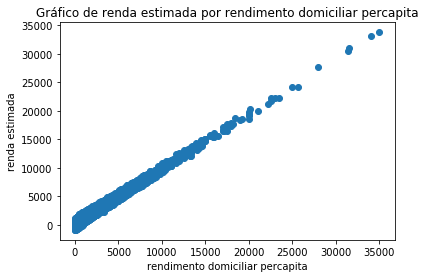

In [26]:
#print(len(Variaveis_Independentes_teste[:,0]))
#print(len(renda_prevista))
plt.scatter(Variaveis_Independentes_teste[:,5],renda_prevista)
plt.title('Gráfico de renda estimada por rendimento domiciliar percapita')
plt.ylabel('renda estimada')
plt.xlabel('rendimento domiciliar percapita')
plt.show()

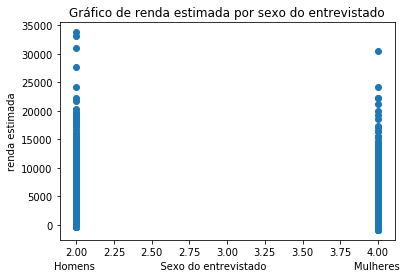

In [34]:
plt.scatter(Variaveis_Independentes_teste[:,1],renda_prevista)
plt.title('Gráfico de renda estimada por sexo do entrevistado')
plt.ylabel('renda estimada')
plt.xlabel('Homens                     Sexo do entrevistado                            Mulheres')
plt.show()
#2 homem, 4 mulher

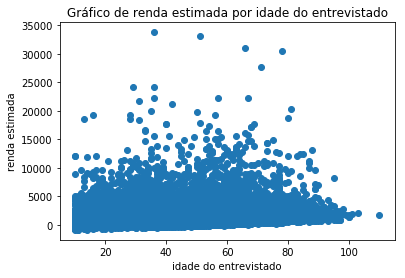

In [35]:
plt.scatter(Variaveis_Independentes_teste[:,2],renda_prevista)
plt.title('Gráfico de renda estimada por idade do entrevistado')
plt.ylabel('renda estimada')
plt.xlabel('idade do entrevistado')
plt.show()

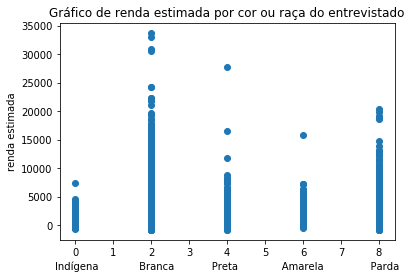

In [54]:
plt.scatter(Variaveis_Independentes_teste[:,3],renda_prevista)
plt.title('Gráfico de renda estimada por cor ou raça do entrevistado')
plt.ylabel('renda estimada')
plt.xlabel('Indígena             Branca            Preta              Amarela               Parda')
plt.show()

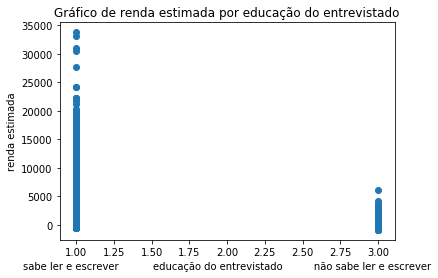

In [56]:
plt.scatter(Variaveis_Independentes_teste[:,4],renda_prevista)
plt.title('Gráfico de renda estimada por educação do entrevistado')
plt.ylabel('renda estimada')
plt.xlabel('sabe ler e escrever           educação do entrevistado          não sabe ler e escrever')
plt.show()

___
## CONCLUSÃO

___
## REFERÊNCIAS BIBLIOGRÁFICAS